In [1]:
import pandas as pd;
import numpy as np;
import tensorflow as tf;

In [2]:
from tensorflow.keras import Sequential;
from tensorflow.keras.layers import Dense, Dropout, InputLayer, Flatten, LSTM;
from tensorflow.keras.optimizers import Adam;
from tensorflow.keras.losses import MeanSquaredError;
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError, RootMeanSquaredError;


In [3]:
df = pd.read_csv('WeatherData/Quezon City Weather Data.csv')
df.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
5213,"Quezon City, National Capital Region, Philippines",2025-04-10,35.9,26.9,30.8,42.7,29.1,35.1,22.9,64.3,...,16.9,6.0,30.0,2025-04-10T05:45:20,2025-04-10T18:09:13,0.40,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"RPLC,RPLL,E0758"
5214,"Quezon City, National Capital Region, Philippines",2025-04-11,35.0,28.8,31.3,41.6,34.0,37.0,24.3,67.3,...,14.6,6.0,30.0,2025-04-11T05:44:40,2025-04-11T18:09:21,0.44,"Rain, Partially cloudy",Clearing in the afternoon with storms possible.,rain,"RPLC,RPLL,E0758"
5215,"Quezon City, National Capital Region, Philippines",2025-04-12,35.9,27.9,31.5,41.7,30.5,36.5,23.5,63.7,...,14.1,7.0,30.0,05:44:01,18:09:30,0.47,"Rain, Partially cloudy",Clearing in the afternoon with late afternoon ...,rain,"['RPLC', 'RPLL', 'E0758']"
5216,"Quezon City, National Capital Region, Philippines",2025-04-13,35.8,28.9,31.2,43.0,34.2,37.5,24.7,69.1,...,13.0,6.0,30.0,05:43:22,18:09:38,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"['RPLC', 'RPLL', 'E0758']"
5217,"Quezon City, National Capital Region, Philippines",2025-04-14,35.0,27.9,31.1,41.7,31.6,36.9,24.4,68.5,...,15.6,6.0,30.0,05:42:44,18:09:47,0.54,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,"['RPLC', 'RPLL', 'E0758']"


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')
df.tail()
print(df['datetime'].dtype)
df.to_csv('WeatherData/Quezon City Weather Data.csv', index=False, date_format='%Y-%m-%d')

datetime64[ns]


In [5]:
df = pd.read_csv('WeatherData/Quezon City Weather Data.csv')
df.tail()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
5213,"Quezon City, National Capital Region, Philippines",2025-04-10,35.9,26.9,30.8,42.7,29.1,35.1,22.9,64.3,...,16.9,6.0,30.0,2025-04-10T05:45:20,2025-04-10T18:09:13,0.40,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"RPLC,RPLL,E0758"
5214,"Quezon City, National Capital Region, Philippines",2025-04-11,35.0,28.8,31.3,41.6,34.0,37.0,24.3,67.3,...,14.6,6.0,30.0,2025-04-11T05:44:40,2025-04-11T18:09:21,0.44,"Rain, Partially cloudy",Clearing in the afternoon with storms possible.,rain,"RPLC,RPLL,E0758"
5215,"Quezon City, National Capital Region, Philippines",2025-04-12,35.9,27.9,31.5,41.7,30.5,36.5,23.5,63.7,...,14.1,7.0,30.0,05:44:01,18:09:30,0.47,"Rain, Partially cloudy",Clearing in the afternoon with late afternoon ...,rain,"['RPLC', 'RPLL', 'E0758']"
5216,"Quezon City, National Capital Region, Philippines",2025-04-13,35.8,28.9,31.2,43.0,34.2,37.5,24.7,69.1,...,13.0,6.0,30.0,05:43:22,18:09:38,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"['RPLC', 'RPLL', 'E0758']"
5217,"Quezon City, National Capital Region, Philippines",2025-04-14,35.0,27.9,31.1,41.7,31.6,36.9,24.4,68.5,...,15.6,6.0,30.0,05:42:44,18:09:47,0.54,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,"['RPLC', 'RPLL', 'E0758']"


In [6]:
new_df = df.copy()
new_df['datetime'] = pd.to_datetime(new_df['datetime'])
new_df.set_index('datetime', inplace=True)
new_df.tail()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
2025-04-10,"Quezon City, National Capital Region, Philippines",35.9,26.9,30.8,42.7,29.1,35.1,22.9,64.3,0.7,...,16.9,6.0,30.0,2025-04-10T05:45:20,2025-04-10T18:09:13,0.40,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"RPLC,RPLL,E0758"
2025-04-11,"Quezon City, National Capital Region, Philippines",35.0,28.8,31.3,41.6,34.0,37.0,24.3,67.3,0.3,...,14.6,6.0,30.0,2025-04-11T05:44:40,2025-04-11T18:09:21,0.44,"Rain, Partially cloudy",Clearing in the afternoon with storms possible.,rain,"RPLC,RPLL,E0758"
2025-04-12,"Quezon City, National Capital Region, Philippines",35.9,27.9,31.5,41.7,30.5,36.5,23.5,63.7,0.1,...,14.1,7.0,30.0,05:44:01,18:09:30,0.47,"Rain, Partially cloudy",Clearing in the afternoon with late afternoon ...,rain,"['RPLC', 'RPLL', 'E0758']"
2025-04-13,"Quezon City, National Capital Region, Philippines",35.8,28.9,31.2,43.0,34.2,37.5,24.7,69.1,4.3,...,13.0,6.0,30.0,05:43:22,18:09:38,0.50,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"['RPLC', 'RPLL', 'E0758']"
2025-04-14,"Quezon City, National Capital Region, Philippines",35.0,27.9,31.1,41.7,31.6,36.9,24.4,68.5,1.4,...,15.6,6.0,30.0,05:42:44,18:09:47,0.54,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,"['RPLC', 'RPLL', 'E0758']"


In [7]:
new_df.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2025-04-05', '2025-04-06', '2025-04-07', '2025-04-08',
               '2025-04-09', '2025-04-10', '2025-04-11', '2025-04-12',
               '2025-04-13', '2025-04-14'],
              dtype='datetime64[ns]', name='datetime', length=5218, freq=None)

In [8]:
new_df.apply(pd.isnull).sum() / new_df.shape[0]
new_df = new_df.fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_15420\3626438343.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df = new_df.fillna(method='ffill')


In [9]:
new_df.apply(pd.isnull).sum() / new_df.shape[0]

name                0.000000
tempmax             0.000000
tempmin             0.000000
temp                0.000000
feelslikemax        0.000000
feelslikemin        0.000000
feelslike           0.000000
dew                 0.000000
humidity            0.000000
precip              0.000000
precipprob          0.000000
precipcover         0.000000
preciptype          0.000000
snow                0.279992
snowdepth           0.279992
windgust            0.000000
windspeed           0.000000
winddir             0.000000
sealevelpressure    0.000000
cloudcover          0.000000
visibility          0.000000
solarradiation      0.000000
solarenergy         0.000000
uvindex             0.000000
severerisk          0.839977
sunrise             0.000000
sunset              0.000000
moonphase           0.000000
conditions          0.000000
description         0.000000
icon                0.000000
stations            0.000000
dtype: float64

In [10]:
new_df = new_df[['tempmin', 'tempmax', 'temp', 'humidity', 'precip', 'windgust']].copy()
new_df.tail()


,tempmin,tempmax,temp,humidity,precip,windgust
datetime,,,,,,
2025-04-10,26.9,35.9,30.8,64.3,0.7,22.3
2025-04-11,28.8,35.0,31.3,67.3,0.3,18.4
2025-04-12,27.9,35.9,31.5,63.7,0.1,17.6
2025-04-13,28.9,35.8,31.2,69.1,4.3,15.1
2025-04-14,27.9,35.0,31.1,68.5,1.4,18.4


In [11]:
temp = new_df['temp']
temp

datetime
2011-01-01    25.2
2011-01-02    25.3
2011-01-03    25.7
2011-01-04    25.1
2011-01-05    25.4
              ... 
2025-04-10    30.8
2025-04-11    31.3
2025-04-12    31.5
2025-04-13    31.2
2025-04-14    31.1
Name: temp, Length: 5218, dtype: float64

In [40]:
def df_to_X_y(temp, window_size=7):
    cw_as_np = temp.to_numpy()
    X = []
    y = []
    for i in range(len(cw_as_np) - window_size):
        row = [[a] for a in cw_as_np[i:i + window_size]]
        X.append(row)
        label = cw_as_np[i + window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [41]:
WINDOW_SIZE = 7;
X1, y1 = df_to_X_y(temp, WINDOW_SIZE);
X1.shape, y1.shape

((5211, 7, 1), (5211,))

In [42]:
def get_data_points(X1, y1):
    
    total_samples = len(X1)
    
    return total_samples

In [43]:
total_samples = get_data_points(X1, y1)
total_samples

5211

In [44]:
X_train1, y_train1 = X1[:total_samples], y1[:total_samples]
X_val1, y_val1 = X1[1:total_samples], y1[1:total_samples]
X_test1, y_test1 = X1[total_samples:], y1[total_samples:]

X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((5211, 7, 1), (5211,), (5210, 7, 1), (5210,), (0, 7, 1), (0,))

In [45]:
model = Sequential([
    InputLayer((WINDOW_SIZE, 1)),
    LSTM(128, return_sequences=True),
    LSTM(128, return_sequences=False),
    Dense(64, 'relu'),
    Dense(64, 'relu'),
    Dense(1, 'linear')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,625 (822.75 KB)

 Trainable params: 210,625 (822.75 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
import os

folder_path = "weatherModels"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

model_count = len([name for name in os.listdir(folder_path) if name.startswith('model')])

model_name = f"{folder_path}/model{model_count + 1}.keras"
print(f"Saving as : {model_name}")

Saving as : weatherModels/model13.keras


In [47]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
cp1 = ModelCheckpoint(model_name, save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [48]:
model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=25 ,batch_size=30, callbacks=[cp1, early_stopping])

Epoch 1/25


174/174 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - loss: 212.9634 - root_mean_squared_error: 13.4769 - val_loss: 2.2438 - val_root_mean_squared_error: 1.4979
Epoch 2/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 2.2165 - root_mean_squared_error: 1.4878 - val_loss: 2.2692 - val_root_mean_squared_error: 1.5064
Epoch 3/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 2.2324 - root_mean_squared_error: 1.4938 - val_loss: 2.2298 - val_root_mean_squared_error: 1.4932
Epoch 4/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 2.2114 - root_mean_squared_error: 1.4868 - val_loss: 1.7437 - val_root_mean_squared_error: 1.3205
Epoch 5/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 1.5194 - root_mean_squared_error: 1.2313 - val_loss: 0.9321 - val_root_mean_squared_error: 0.9654
Epoch 6/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.9278 - root_mean_squared_error: 0.9626 - val_loss: 0.8116 - val_root_mean_squared_error: 0.9009
Epoch 7/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step 

In [27]:
from tensorflow.keras.models import load_model
qc_model = load_model('weatherModels/model6.keras')

In [31]:
train_predictions = qc_model.predict(X_train1)
print(train_predictions.shape)
print('-------------------')
y_train1.shape

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
(5198, 1)
-------------------


(5198, 7)

In [28]:
train_predictions = qc_model.predict(X_train1)
train_predictions = train_predictions.flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Train Actual': y_train1})

import matplotlib.pyplot as plt

plt.plot(train_results['Train Predictions'][5000:5220], label='Train Predictions')
plt.plot(train_results['Train Actual'][5000:5220], label='Train Actual')
plt.legend
plt.show()

163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


ValueError: Per-column arrays must each be 1-dimensional

In [26]:
print(train_results['Train Predictions'][5100:5217])
print(train_results['Train Actual'][5100:5217])
train_results.count()

5100    25.826571
5101    25.503643
5102    26.649643
5103    27.095726
5104    25.999601
          ...    
5206    30.558043
5207    30.463074
5208    30.820345
5209    30.968700
5210    30.852684
Name: Train Predictions, Length: 111, dtype: float32
5100    24.5
5101    26.8
5102    27.3
5103    25.5
5104    25.1
        ... 
5206    30.8
5207    31.3
5208    31.5
5209    31.2
5210    30.9
Name: Train Actual, Length: 111, dtype: float64


Train Predictions    5211
Train Actual         5211
dtype: int64

In [28]:
from sklearn.metrics import mean_squared_error as mse;

def plot_predictions(model, X, y, start=0, end=100):
    preds = model.predict(X)
    preds = preds.flatten()
    df = pd.DataFrame(data={'Predictions': preds, 'Actuals': y})
    plt.plot(df['Predictions'][start:end])
    plt.plot(df['Actuals'][start:end])
    return df, mse(y, preds)

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


(      Predictions  Actuals
 0       26.318769     26.3
 1       26.427774     24.9
 2       25.668541     25.9
 3       26.113712     25.9
 4       26.134872     25.7
 ...           ...      ...
 5206    30.558043     30.8
 5207    30.463074     31.3
 5208    30.820345     31.5
 5209    30.968700     31.2
 5210    30.852684     30.9
 
 [5211 rows x 2 columns],
 0.5712646968241694)

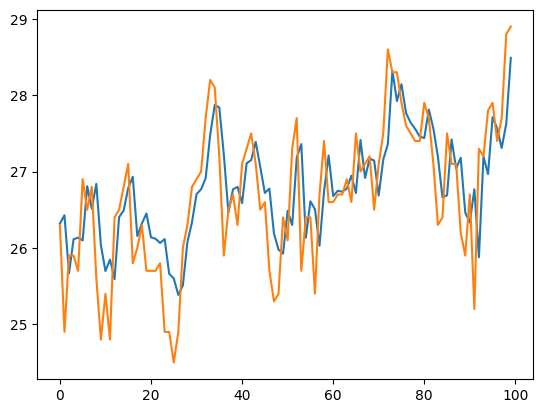

In [31]:
plot_predictions(qc_model, X_train1, y_train1)